In [2]:
import numpy as np
import pandas as pd

def generate_dataset(m, n_samples=500):
    # Generate data for class y = 0
    x1_y0 = np.random.normal(0, 1, n_samples)
    x2_y0 = np.random.normal(0, 1, n_samples)
    y0 = np.zeros(n_samples)

    # Generate data for class y = 1
    x1_y1 = np.random.normal(m, 1, n_samples)
    x2_y1 = np.random.normal(m, 1, n_samples)
    y1 = np.ones(n_samples)

    # Combine the data
    x1 = np.concatenate([x1_y0, x1_y1])
    x2 = np.concatenate([x2_y0, x2_y1])
    y = np.concatenate([y0, y1])

    # Create a DataFrame
    data = pd.DataFrame({
        'x1': x1,
        'x2': x2,
        'y': y
    })

    return data

# Parameters
m_values = [0.5, 1, 2, 3]

# Generate datasets for different values of m
datasets = {m: generate_dataset(m) for m in m_values}


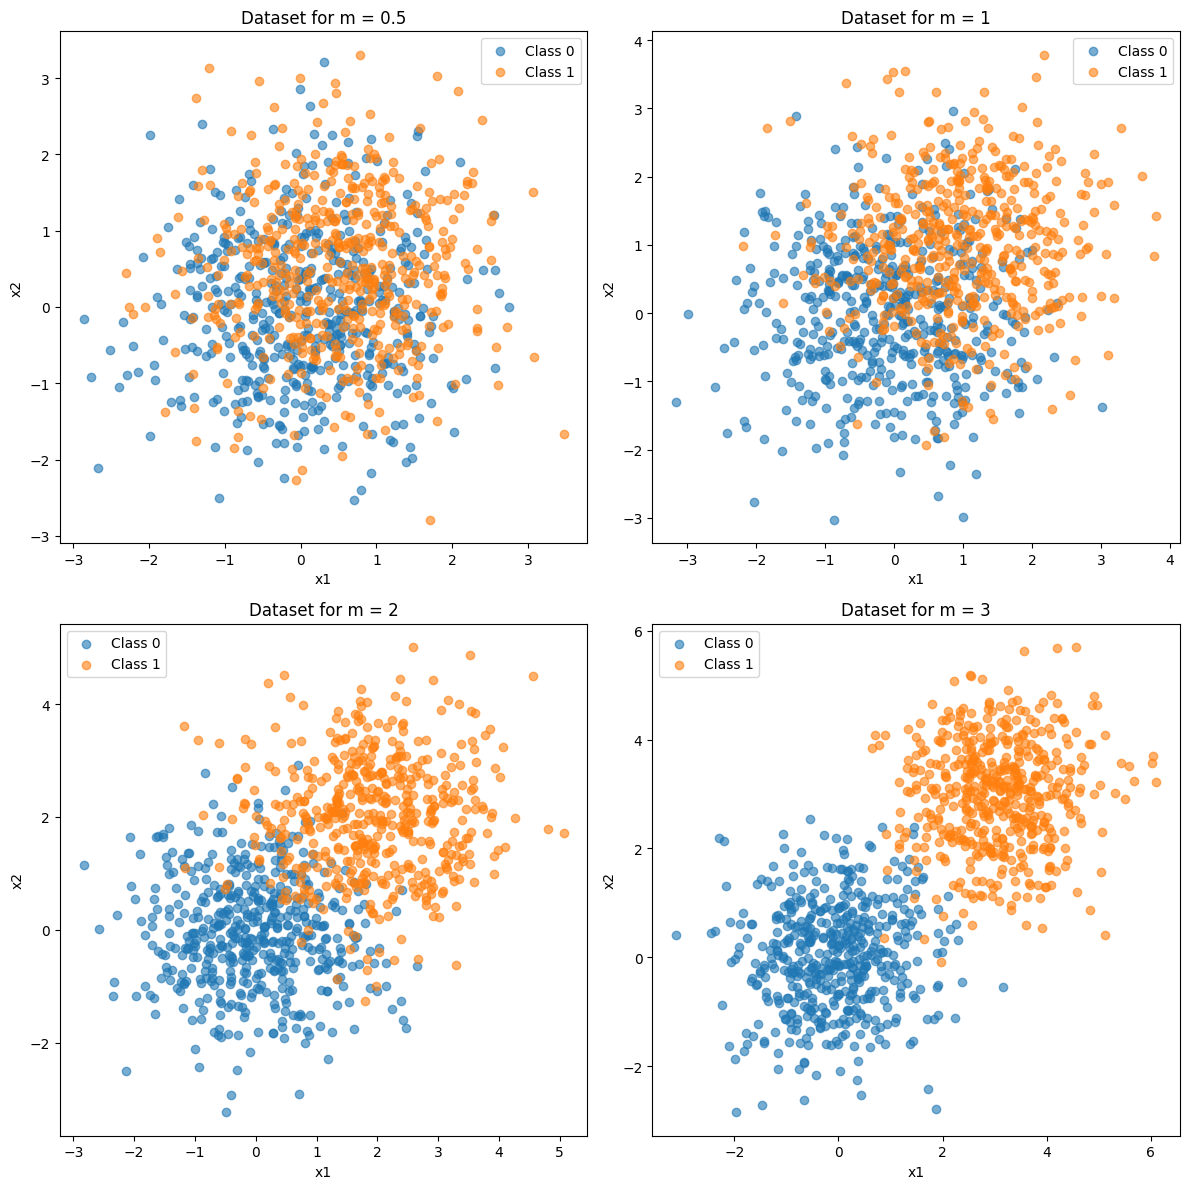

In [3]:
import matplotlib.pyplot as plt

# Generate and visualize datasets for different values of m
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for ax, m in zip(axs.flatten(), m_values):
    data = generate_dataset(m)
    
    ax.scatter(data[data['y'] == 0]['x1'], data[data['y'] == 0]['x2'], label='Class 0', alpha=0.6)
    ax.scatter(data[data['y'] == 1]['x1'], data[data['y'] == 1]['x2'], label='Class 1', alpha=0.6)
    
    ax.set_title(f'Dataset for m = {m}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

plt.tight_layout()
plt.show()

In [4]:
def generate_data2(n_samples=500, noise_level=0.1):
    # Class y = 1
    x1_y1 = np.random.uniform(-1, 1, n_samples)
    x2_y1 = np.sqrt(1 - x1_y1**2) * np.sign(np.random.uniform(-1, 1, n_samples))
    x1_y1 += np.random.normal(0, noise_level, n_samples)
    x2_y1 += np.random.normal(0, noise_level, n_samples)
    y1 = np.ones(n_samples)
    
    # Class y = 0
    x1_y0 = np.random.uniform(-2, 2, n_samples)
    x2_y0 = np.sqrt(4 - x1_y0**2) * np.sign(np.random.uniform(-1, 1, n_samples))
    x1_y0 += np.random.normal(0, noise_level, n_samples)
    x2_y0 += np.random.normal(0, noise_level, n_samples)
    y0 = np.zeros(n_samples)
    
    # Combine the data
    x1 = np.concatenate([x1_y0, x1_y1])
    x2 = np.concatenate([x2_y0, x2_y1])
    y = np.concatenate([y0, y1])
    
    # Create a DataFrame
    data = pd.DataFrame({
        'x1': x1,
        'x2': x2,
        'y': y
    })
    
    return data

# Generate the dataset
data = generate_data2()



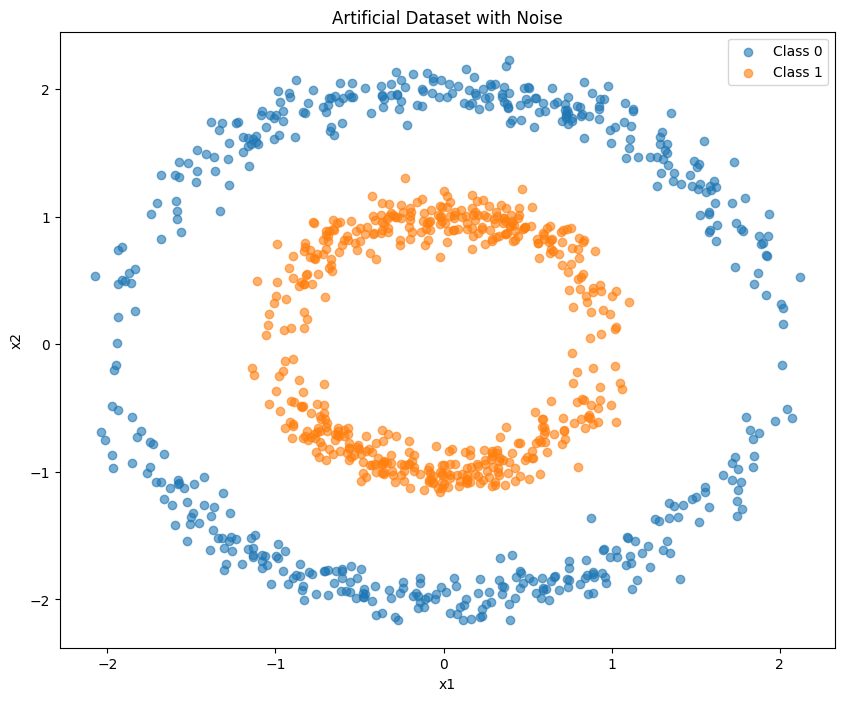

In [5]:
# Visualize the dataset
plt.figure(figsize=(10, 8))
plt.scatter(data[data['y'] == 0]['x1'], data[data['y'] == 0]['x2'], label='Class 0', alpha=0.6)
plt.scatter(data[data['y'] == 1]['x1'], data[data['y'] == 1]['x2'], label='Class 1', alpha=0.6)
plt.title('Artificial Dataset with Noise')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

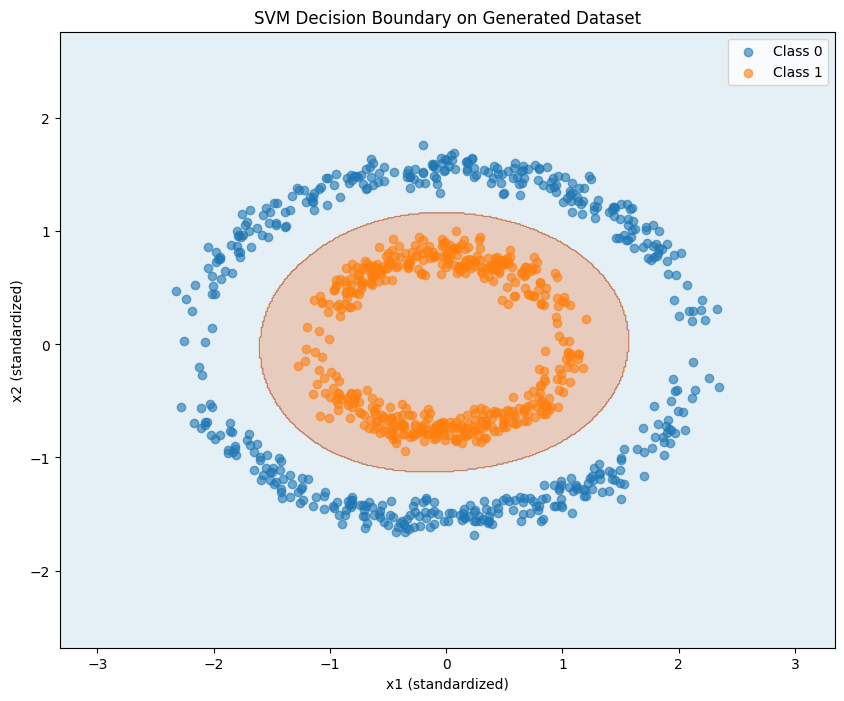

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate the dataset
data = generate_data2()

# Split data into features and target
X = data[['x1', 'x2']]
y = data['y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_scaled, y)

# Plotting the results
plt.figure(figsize=(10, 8))

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, 500),
                     np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, 500))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the data points
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], label='Class 1', alpha=0.6)

plt.title('SVM Decision Boundary on Generated Dataset')
plt.xlabel('x1 (standardized)')
plt.ylabel('x2 (standardized)')
plt.legend()
plt.show()